In [1]:
from pickle import dump, load
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

DESCARGAR EL MODELO Y EL TOKENIZADOR

In [2]:
# Cargar el procesador y el modelo
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Guardar el procesador y el modelo localmente en las rutas especificadas
# MODIFICAR LAS RUTAS SEGÚN CADA UNO
'''processor_path = r"E:\SATURDAYSAI\PROYECTO_FINAL\modelos_preentrenados\blip-image-captioning-processor-large"
model_path = r"E:\SATURDAYSAI\PROYECTO_FINAL\modelos_preentrenados\blip-image-captioning-model-large"'''

# CARLOS
processor_path = r"C:\\Users\\carlo\\OneDrive\\Documentos\\img_to_nlp\\blip-image-captioning-processor"
model_path = r"C:\\Users\\carlo\\OneDrive\\Documentos\\img_to_nlp\\blip-image-captioning-model"

processor.save_pretrained(processor_path)
model.save_pretrained(model_path)

# Función para calcular el tamaño del directorio
def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Verificar el tamaño de los directorios guardados
processor_size = get_directory_size(processor_path) / (1024 * 1024)  # Convertir a MB
model_size = get_directory_size(model_path) / (1024 * 1024)  # Convertir a MB

print(f"Tamaño del procesador: {processor_size:.2f} MB")
print(f"Tamaño del modelo: {model_size:.2f} MB")

<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\carlo\AppData\Local\Temp\ipykernel_3512\3026687980.py:7: SyntaxWarning: invalid escape sequence '\S'
  '''processor_path = r"E:\SATURDAYSAI\PROYECTO_FINAL\modelos_preentrenados\blip-image-captioning-processor-large"


Tamaño del procesador: 0.90 MB
Tamaño del modelo: 1791.96 MB


In [3]:

#Verificar si existen nucleos cuda
print(f"CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Nombre del dispositivo: {torch.cuda.get_device_name(0)}")

# Configurar el dispositivo (GPU o CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


CUDA disponible: True
Nombre del dispositivo: NVIDIA GeForce RTX 4060 Laptop GPU


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-23): 24 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (projection): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1024,),

PREPROCESAR LA IMAGEN

In [7]:
# Obtener la lista de nombres de archivo en el directorio de imágenes
image_dir = '../data/output/divide_images_test/Chapter01/page2_img'
image_files = os.listdir(image_dir)

In [5]:
# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    return inputs, image

GENERAR LA DESCRIPCIÓN DE LA IMAGEN

Using cuda device


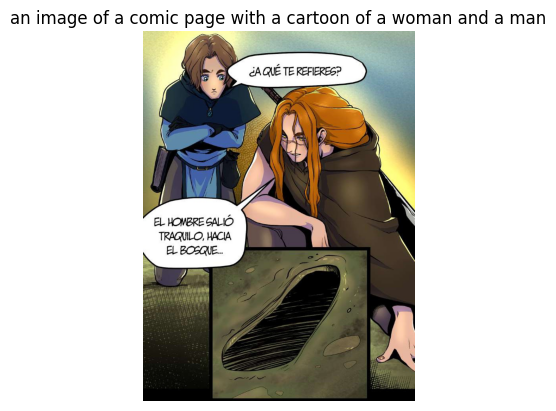

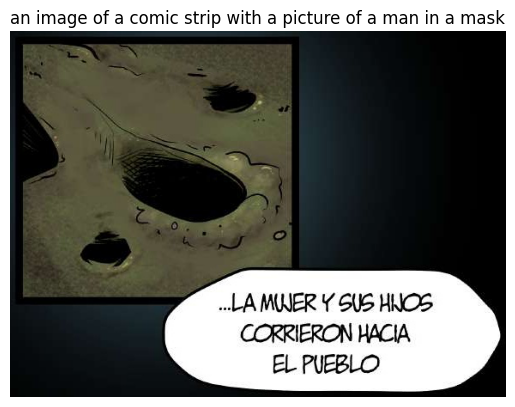

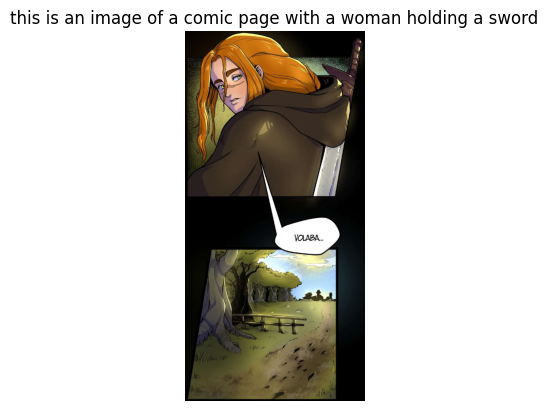

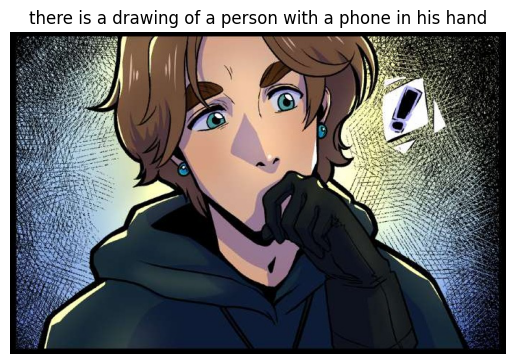

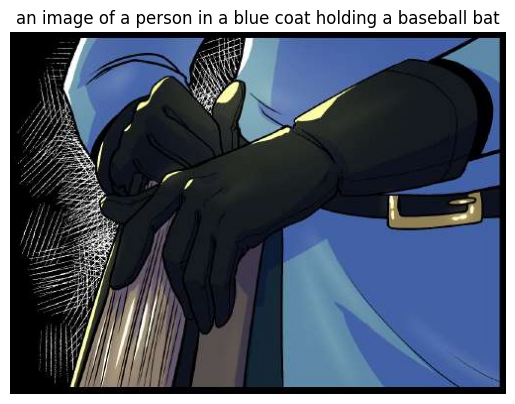

In [8]:
# Comprobar si CUDA está disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')


# Bucle para describir cada imagen en el directorio
for image_file in image_files:
    # Construir la ruta completa de la imagen
    image_path = os.path.join(image_dir, image_file)
    
    # Procesar la imagen
    inputs, image = load_and_preprocess_image(image_path)
    
    # Mover los datos a la GPU si está disponible
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
    
    # Generar la descripción de la imagen con parámetros ajustados
    outputs = model.generate(
        **inputs,
        max_length=100,    # Longitud máxima de la descripción
        num_beams=5,       # Búsqueda en haz
        length_penalty=2.0,  # Penalización por longitud
        early_stopping=True
    )
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    
    # Imprimir la descripción y mostrar la imagen
    plt.imshow(image)
    plt.title(caption)
    plt.axis('off')
    plt.show()
